In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes = True)

#removing warnings from the output
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading the csv file into the pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/ripatanny101/Customer-Behavior-Analysis/main/shopping_behavior_updated.csv')

In [ ]:
#take a look at the dataset
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Data Cleaning

In [ ]:
#checking for null values
df.isnull().sum()      #there is no null values

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [ ]:
#checking for duplicate values
df.duplicated().value_counts()    #there are no duplicate values, so no need for performing drop_duplicates()

False    3900
Name: count, dtype: int64

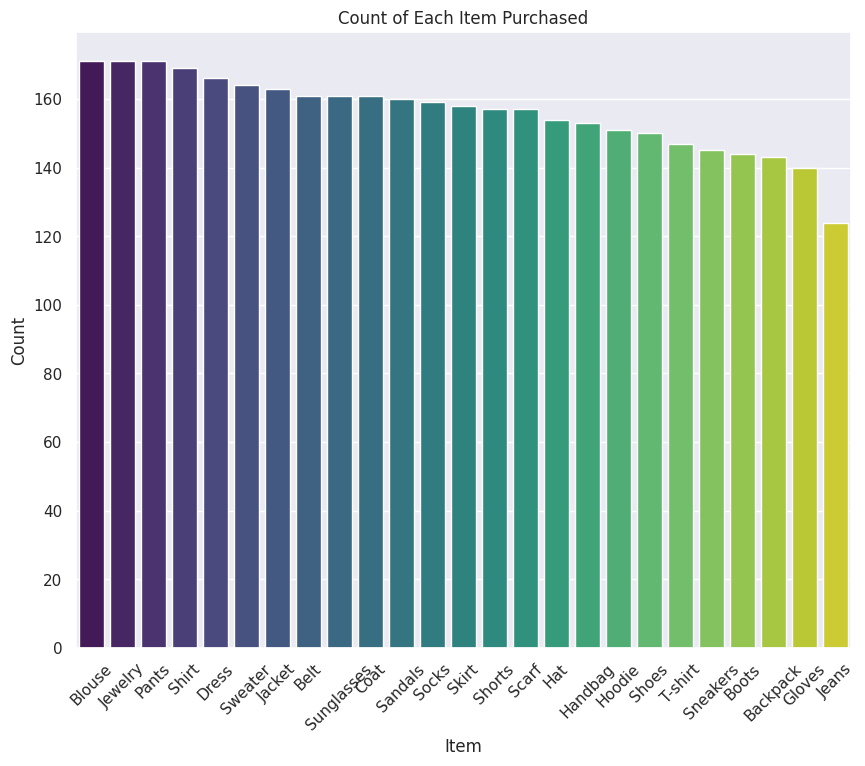

In [ ]:
#Bar Chart of Item Purchased

item_counts = df['Item Purchased'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=item_counts.index, y=item_counts.values, palette='viridis')
plt.title('Count of Each Item Purchased')
plt.xlabel('Item')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


* The "Blouse" item has the highest count of purchases, visibly more than any other item, with "Jewelry" and "Pants" also showing high popularity. Items like "Jeans" and "Backpack" have the least purchases.
* Suggestion: Focus marketing efforts and stock on high-demand items like Blouses, while considering promotional strategies less popular items such as Jeans and Backpacks.

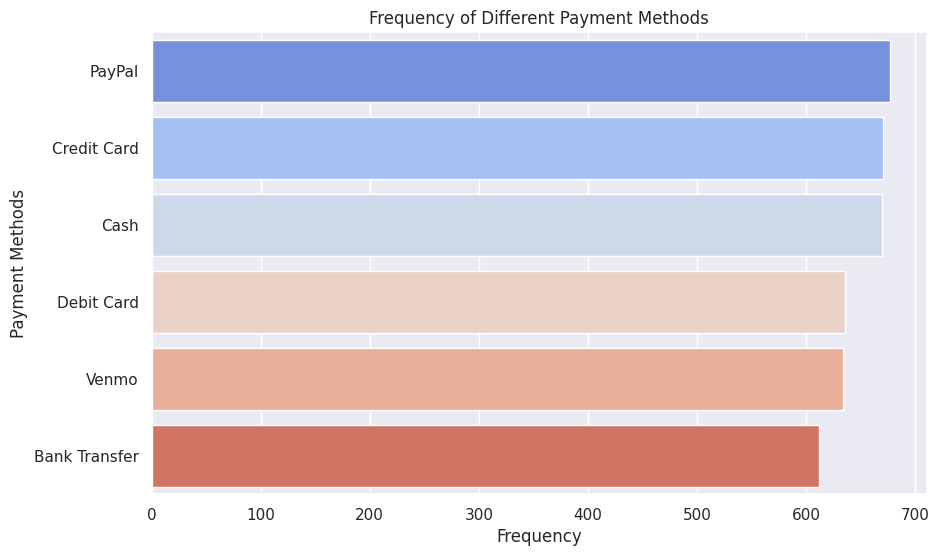

In [ ]:
# Horizontal Bar Plot of Payment Methods

payment_methods = df['Payment Method'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_methods.values, y=payment_methods.index, orient='h', palette='coolwarm')
plt.title('Frequency of Different Payment Methods')
plt.xlabel('Frequency')
plt.ylabel('Payment Methods')
plt.show()


* PayPal is the most frequently used payment method, followed closely by Credit Card, indicating a preference for secure and convenient online payment options.
* Suggestion: Enhance the customer checkout experience by optimizing PayPal and credit card transactions. Consider promotions to encourage the use of less popular payment methods like Bank Transfers, which show the lowest usage.

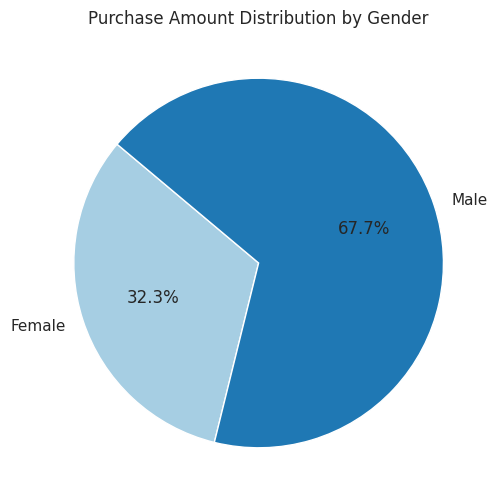

In [ ]:
# differences in purchasing behavior between genders

# Aggregate purchase amounts by gender
gender_purchases = df.groupby('Gender')['Purchase Amount (USD)'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_purchases, labels=gender_purchases.index, autopct='%.1f%%', startangle=140, colors=plt.cm.Paired(range(len(gender_purchases))))
plt.title('Purchase Amount Distribution by Gender')
plt.show()

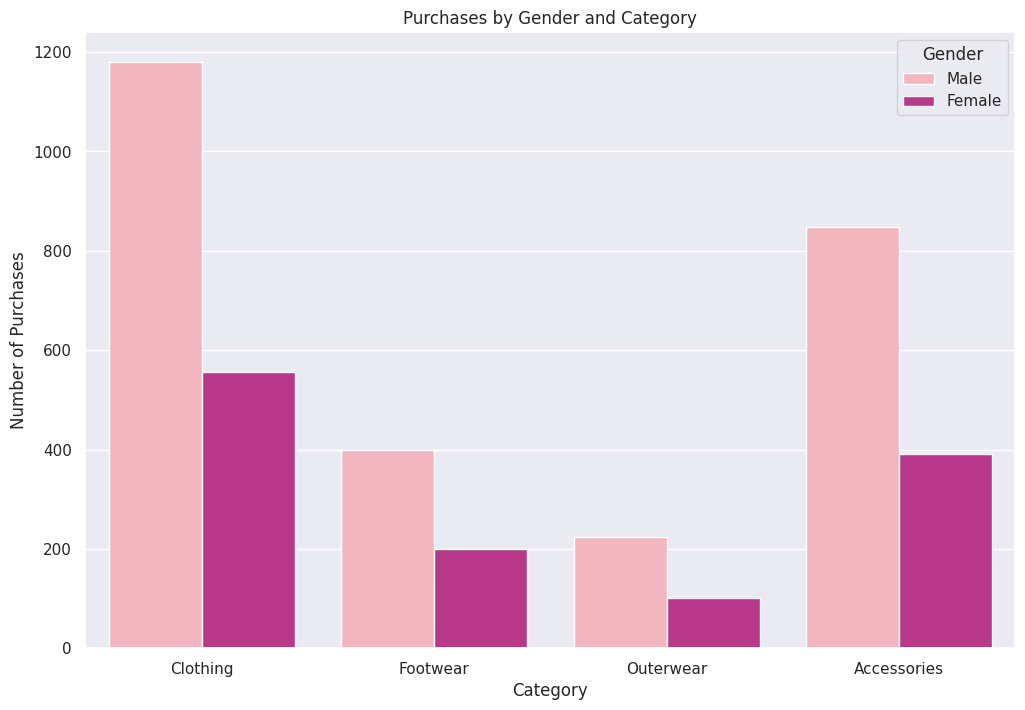

In [ ]:
# Multiset Bar Plot of Purchases by Gender and Category

plt.figure(figsize=(12, 8))
sns.countplot(x='Category', hue='Gender', data=df, palette='RdPu')
plt.title('Purchases by Gender and Category')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.legend(title='Gender')
plt.show()


* Across all the categories, male customers dominate the purchases, significantly more than females.
* Suggestion: Develop targeted marketing campaigns aimed at females.

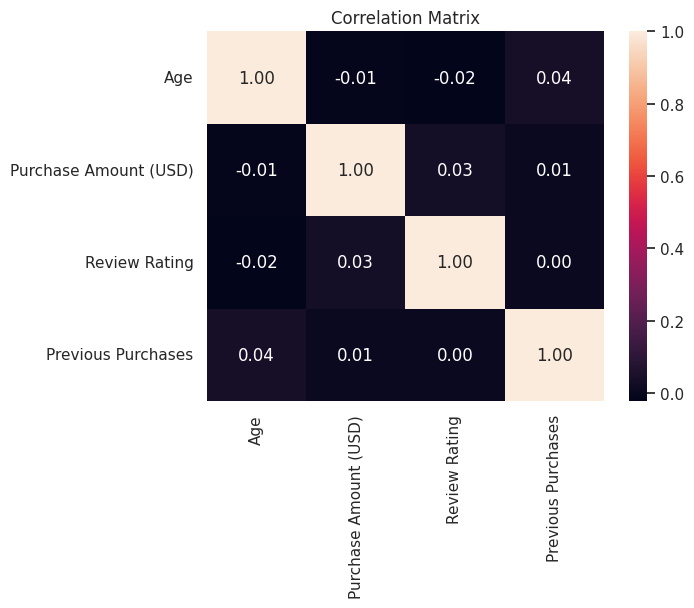

In [ ]:
# Correlation Matrix (Heatmap)

sns.heatmap(df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

* There are no strong correlations between the variables presented; all coefficients are close to zero. This indicates no significant direct relationships between Age, Purchase Amount, Review Rating, and Previous Purchases.
* Suggestion: Since there is a lack of strong correlations, marketing strategies should not rely on these relationships alone. Consider deeper behavioral analytics to understand the customer purchasing patterns.

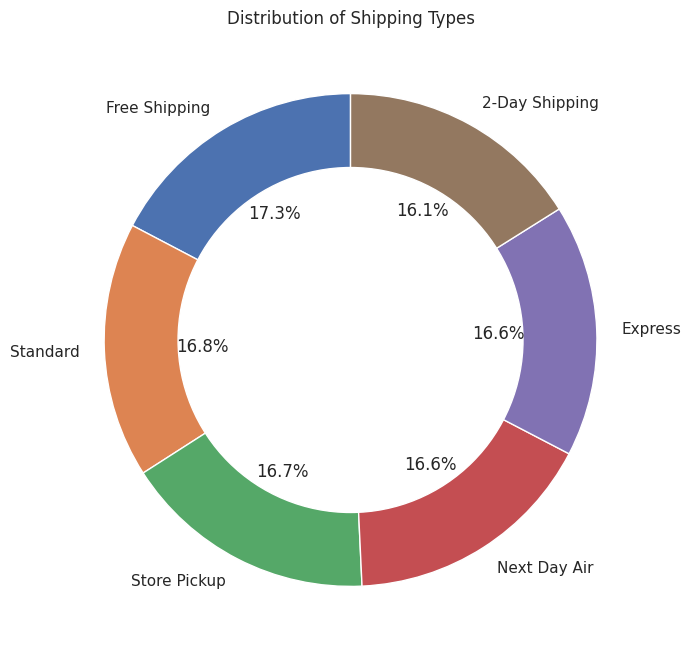

In [ ]:
# Donut Chart of Shipping Types

shipping_counts = df['Shipping Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(shipping_counts, labels=shipping_counts.index, autopct='%1.1f%%', startangle=90)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Distribution of Shipping Types')
plt.show()


* The shipping types are almost evenly distributed, with each category receiving relatively equal preference.

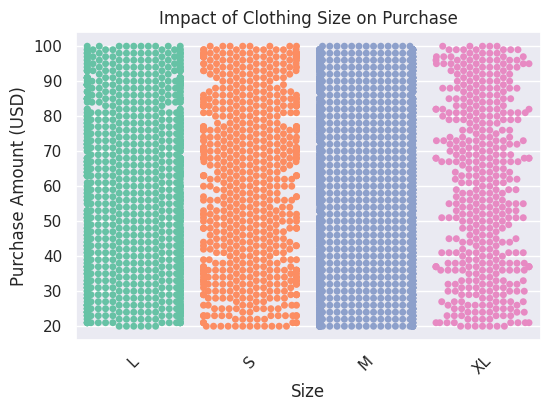

In [ ]:
# Swarm Plot of Impact of clothing Size on Purchase

plt.figure(figsize=(6, 4))
sns.swarmplot(x='Size', y='Purchase Amount (USD)', data=df, palette='Set2')
plt.title("Impact of Clothing Size on Purchase")
plt.xlabel('Size')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

* The purchase amounts are fairly consistent across sizes S, M, and L, but XL shows notably less data points, suggesting fewer purchases.
* Suggestion: Investigate the lower sales volume for size XL and consider inventory adjustments or targeted promotions to boost sales in this size category

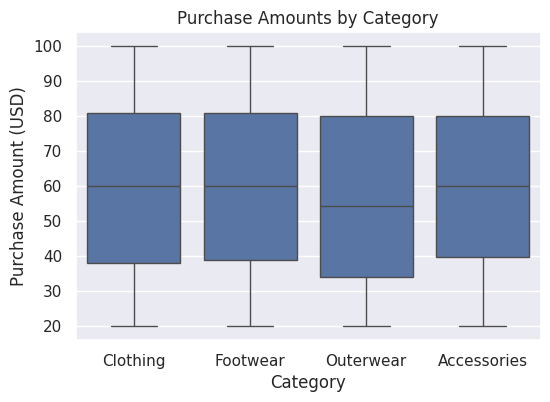

In [ ]:
# Box Plot of Purchase Amount by Category

plt.figure(figsize=(6, 4))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.show()


* The median purchase amount is roughly similar across all categories, but the spread (interquartile range) of purchase amounts in "Outerwear" is wider.
* Suggestion: Given the broader price range in Outerwear, consider diversifying the product offerings in these categories to cater to both budget-conscious and premium buyers.


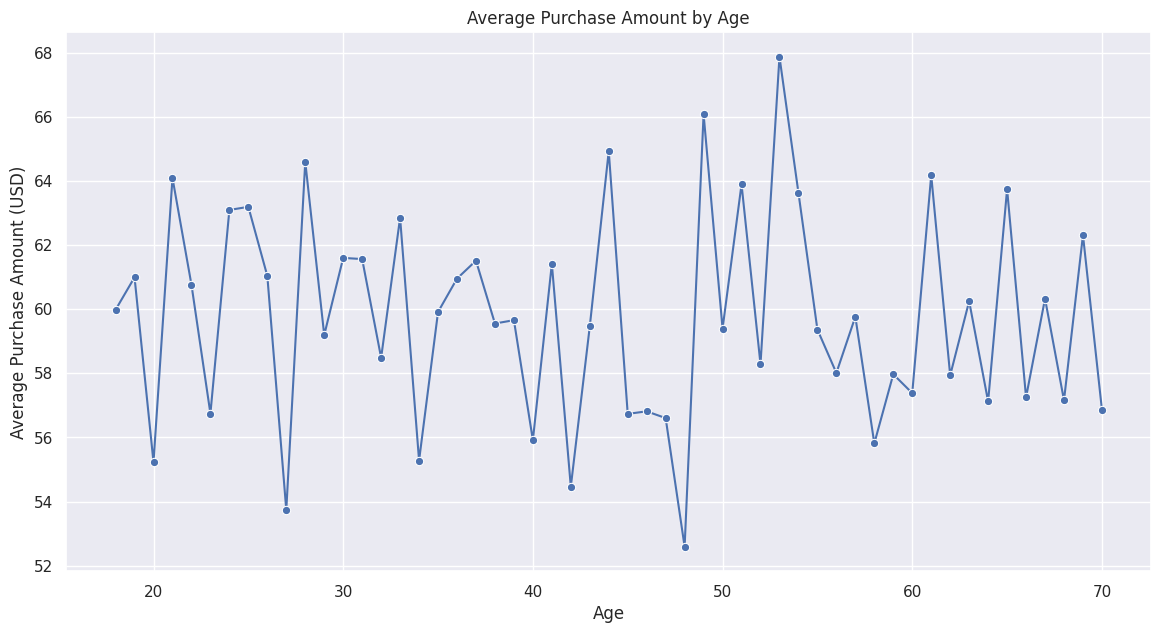

In [ ]:
# Line Plot of Average Purchase Amount by Age


# Grouping data to find the average purchase amount by age
age_purchase = df.groupby('Age')['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Age', y='Purchase Amount (USD)', data=age_purchase, marker='o')
plt.title('Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


* There is considerable fluctuation in the average purchase amount across different ages, with notable peaks around ages 40s and 50s.
* Suggestion: Target marketing campaigns and product designs to appeal to the age groups showing higher spending patterns, especially those in their 50s, possibly indicating peak earning years.

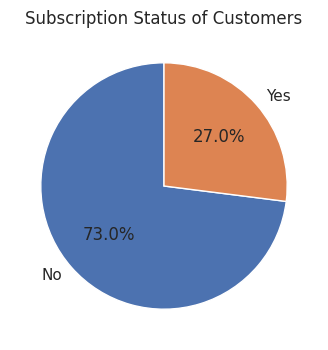

In [ ]:
# Pie Chart of Subscription Status

subscription_counts = df['Subscription Status'].value_counts()

plt.figure(figsize=(5, 4))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Subscription Status of Customers')
plt.show()


* Only 27% of customers are subscribed to services/products, suggesting a significant portion of the customer base is not engaged in loyalty programs.
* Suggestion: Develop strategies to increase subscription rates, such as offering exclusive benefits or discounts to subscribers to enhance customer retention and value.


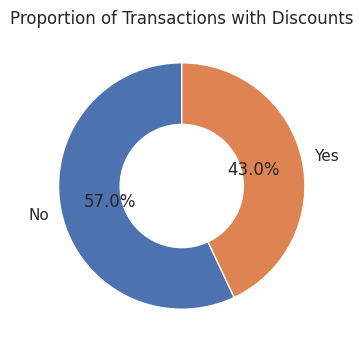

In [ ]:
# Half Donut Chart of Discount Application

discount_counts = df['Discount Applied'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(discount_counts, labels=discount_counts.index, autopct='%1.1f%%', startangle=90)
plt.gca().add_artist(plt.Circle((0, 0), 0.5, color='white'))
plt.title('Proportion of Transactions with Discounts')
plt.show()


Around 43% of transactions involve discounts and 57% of transactions do not involve discout. This suggest that promotional offers are not a significant part of the sales strategy.

* 43% of transactions involve discounts, which is substantial but shows room for growth in utilizing discounts to drive sales.
* Suggestion: Analyze the impact of discounts on sales volumes and customer acquisition to adjust the discount strategy for optimal impact

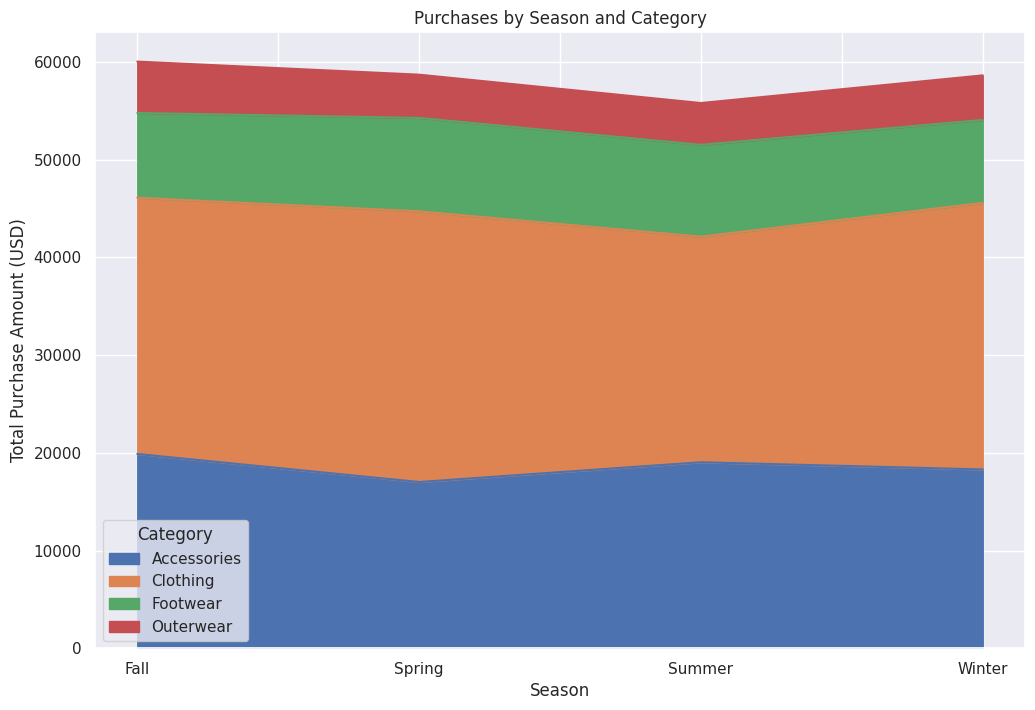

In [ ]:
# Stacked Area Chart of Purchases by Season and Category


# Creating a pivot table
area_data = df.pivot_table(index='Season', columns='Category', values='Purchase Amount (USD)', aggfunc='sum', fill_value=0)

# Plotting
area_data.plot(kind='area', stacked=True, figsize=(12, 8))
plt.title('Purchases by Season and Category')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()


* "Clothing" and "Footwear" lead the sales across all seasons, with a noticeable increase in "Outerwear" during the Fall and Winter seasons.
* Suggestion: Prepare inventory and marketing efforts seasonally, focusing on Outerwear in colder months and maintaining a strong supply of Clothing and Footwear year-round.


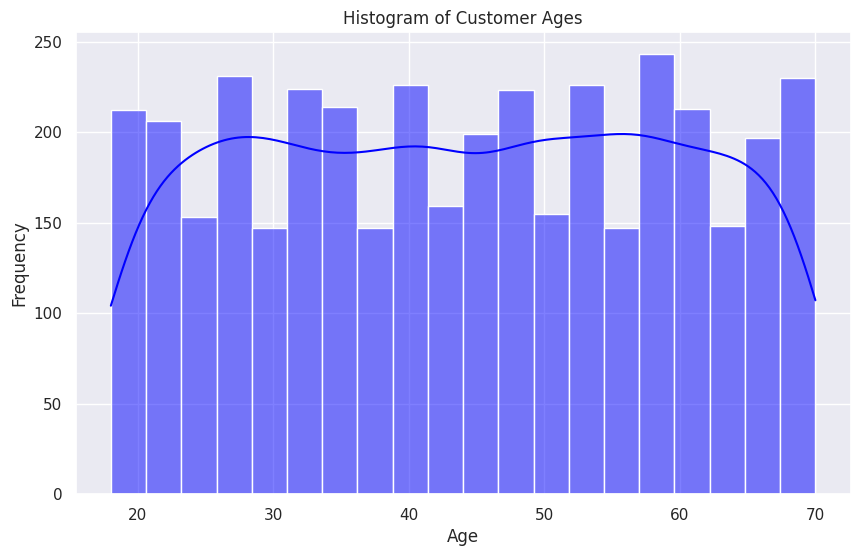

In [ ]:
# Histogram of Customer Ages

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Histogram of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


* The histogram peaks in the 60 age range which suggests that seniors are the primary consumers.
* The age group of 60 might be the most frequent, indicating that this demographic is the primary consumer base, possibly due to higher disposable income and different lifestyle needs that match the product offerings

* The customer base has a fairly normal distribution of ages with a slight skew towards younger demographics, peaking in the 30-60 age range.
* Suggestion: Since the bulk of customers are in their 30s and 40s, tailor marketing messages and product features to fit the lifestyle needs of these age groups, which may include quality, style, and functionality.